**Nama : Amin Fahri**

**Program : Introduction to Python for Data Science**

**Kode Peserta : PYTN-KS01-002**

# Assignment Python 3

# Import Library and Dataset

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option("display.max.columns", None) # untuk menampilkan semua kolom pada dataset

In [5]:
df = pd.read_csv('bank-full.csv')
df_raw = df
df_raw.head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."


In [8]:
df_bank = pd.read_csv('bank-full.csv',sep=';',engine='python')
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
df_bank.shape

(45211, 17)

In [10]:
df_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [11]:
df_bank = df_bank.rename(columns={'y': 'deposit'}) 
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Preprocessing Dataset

## Cek Kesesuaian Tipe Data

In [15]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  object  
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  deposit    45211 non-null  category
dtypes: category(9), int64(7), object(1)
memory usage: 3.1+ MB


In [16]:
#konversi tipe data categorical
categorical = ["job","marital","education", "default", "housing", "loan", "contact", "poutcome","deposit"]

for col in categorical: 
    df_bank[col] = df_bank[col].astype("category")

In [18]:
#cek kembali tipe data
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  object  
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  deposit    45211 non-null  category
dtypes: category(9), int64(7), object(1)
memory usage: 3.1+ MB


## Identifikasi Kolom dengan Nilai Tunggal

In [19]:
# melihat unique values dari setiap kolom
counts = df_bank.nunique()
counts

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
deposit         2
dtype: int64

## Identify Duplicate Data

In [20]:
# cek apakah ada duplikasi data pada dataset

df_bank.duplicated().any()

False

In [21]:
# melihat jumlah duplikasi data yang ada dalam dataset

df_bank.duplicated().sum()

0

## Cek Missing Values

In [22]:
# cek missing values berupa nilai NA pada dataset
df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [23]:
from numpy import nan

df_bank = df_bank.replace(' ', nan)

In [24]:
df_bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

# Visualization

<AxesSubplot:xlabel='marital', ylabel='count'>

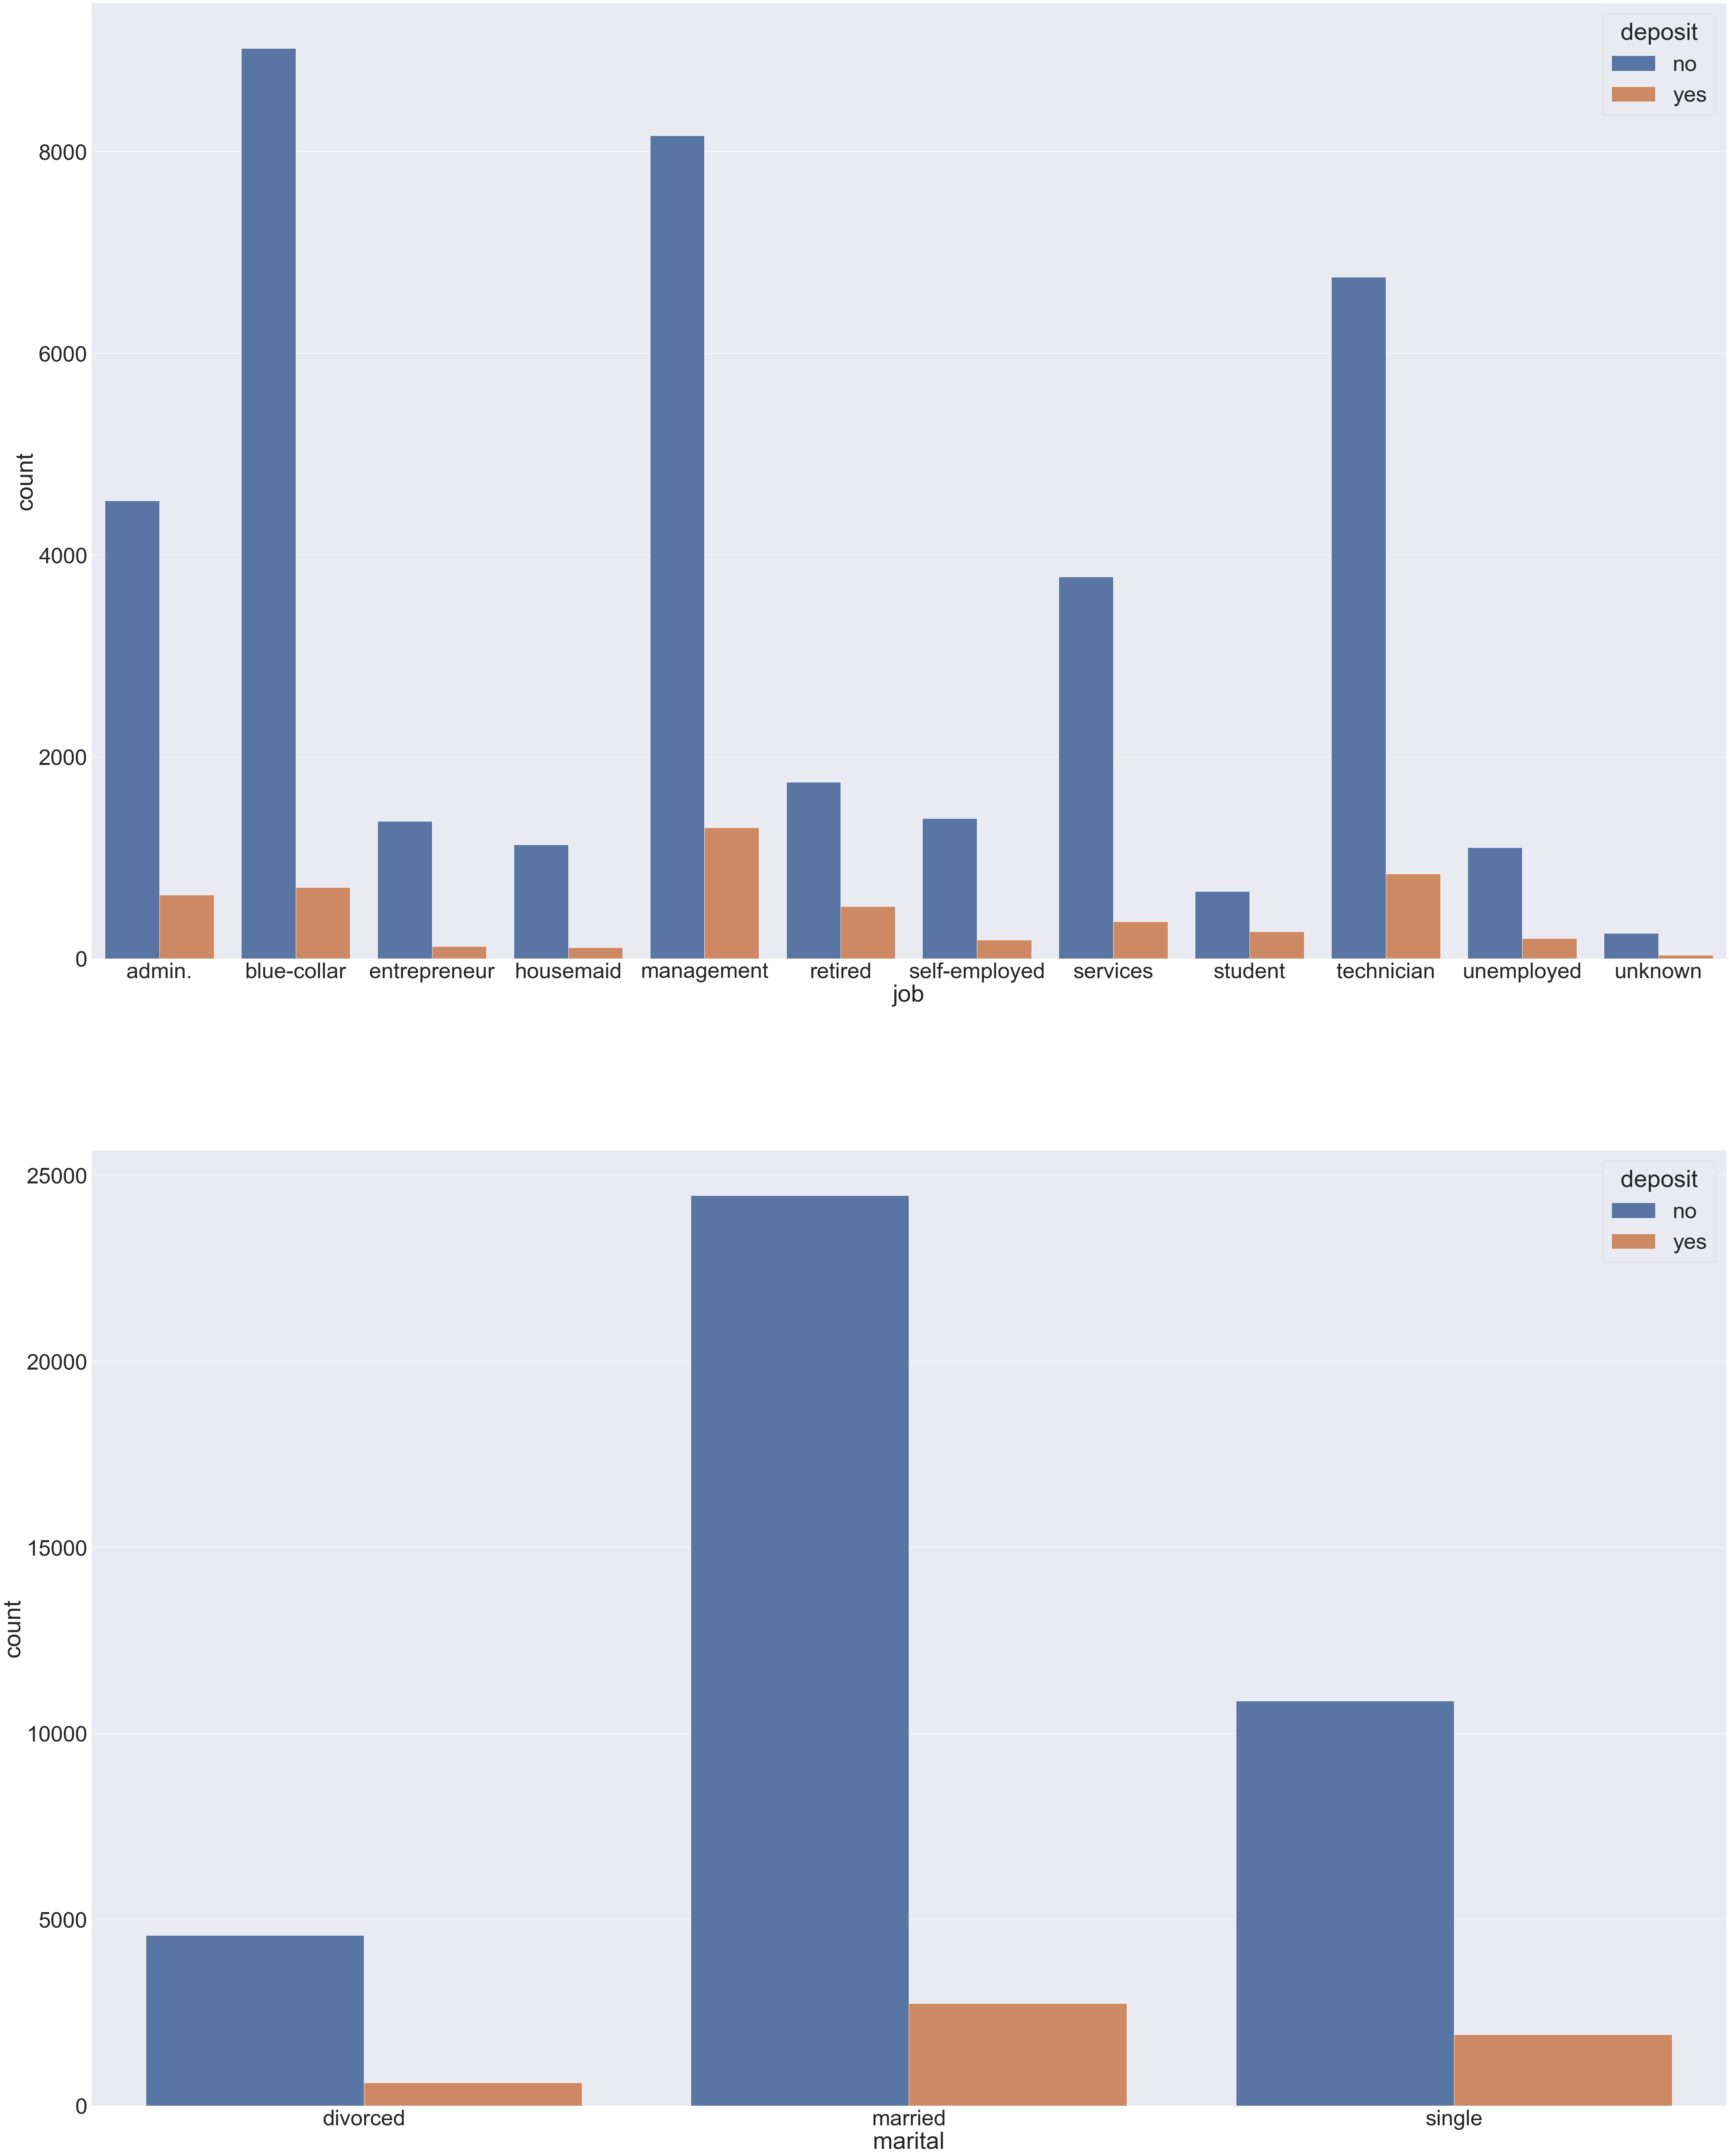

In [26]:
plt.figure(figsize = (250, 150))
sns.set(font_scale = 5)

plt.subplot(331)
sns.countplot(df_bank['job'],hue=df_bank['deposit'])

plt.subplot(334)
sns.countplot(df_bank['marital'],hue=df_bank['deposit'])

<AxesSubplot:xlabel='poutcome', ylabel='count'>

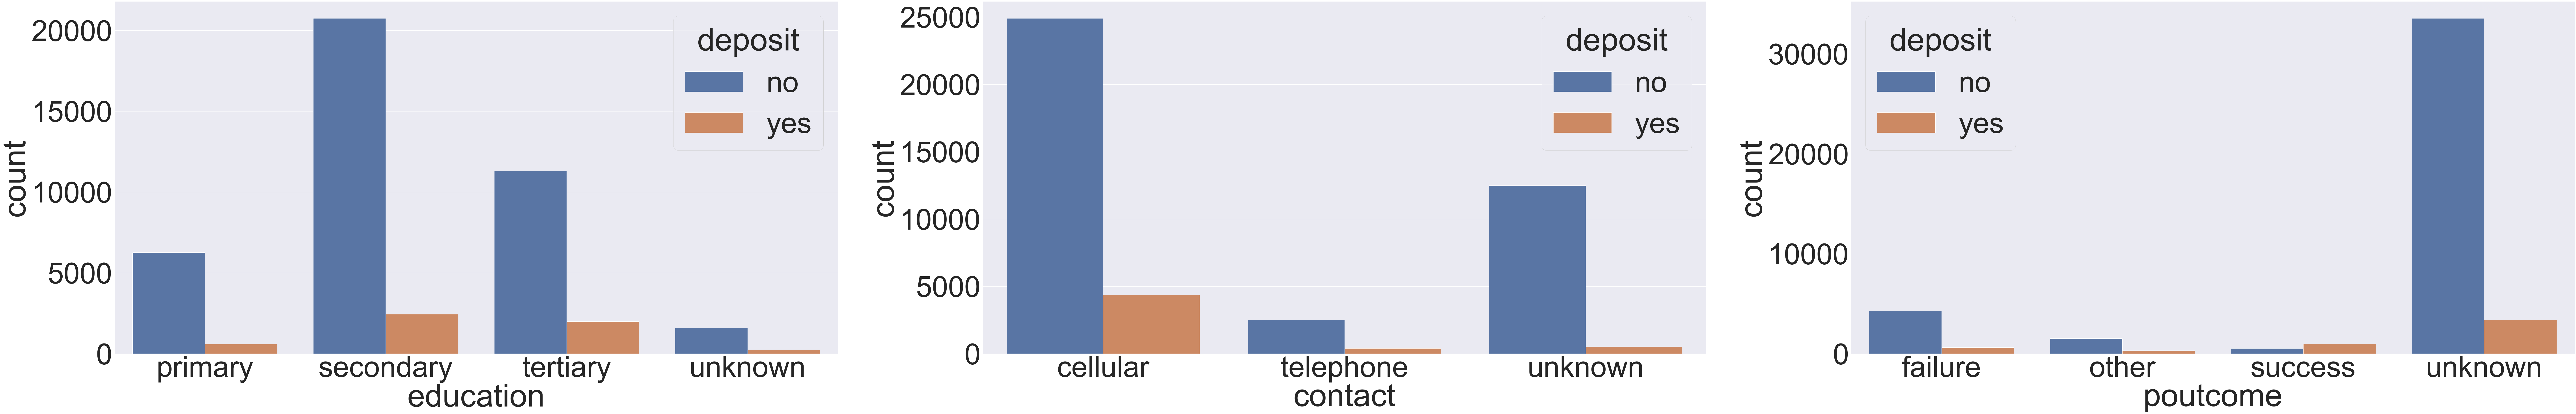

In [27]:
plt.figure(figsize = (200, 100))
sns.set(font_scale = 12)

plt.subplot(331)
sns.countplot(df_bank['education'],hue=df_bank['deposit'])

plt.subplot(332)
sns.countplot(df_bank['contact'],hue=df_bank['deposit'])

plt.subplot(333)
sns.countplot(df_bank['poutcome'],hue=df_bank['deposit'])

## Distribusi Class

In [83]:
df_deposit = df_bank['deposit'].value_counts()
df_deposit

no     39922
yes     5289
Name: deposit, dtype: int64

In [85]:
lables=df_bank['deposit'].unique()
lables

['no', 'yes']
Categories (2, object): ['no', 'yes']

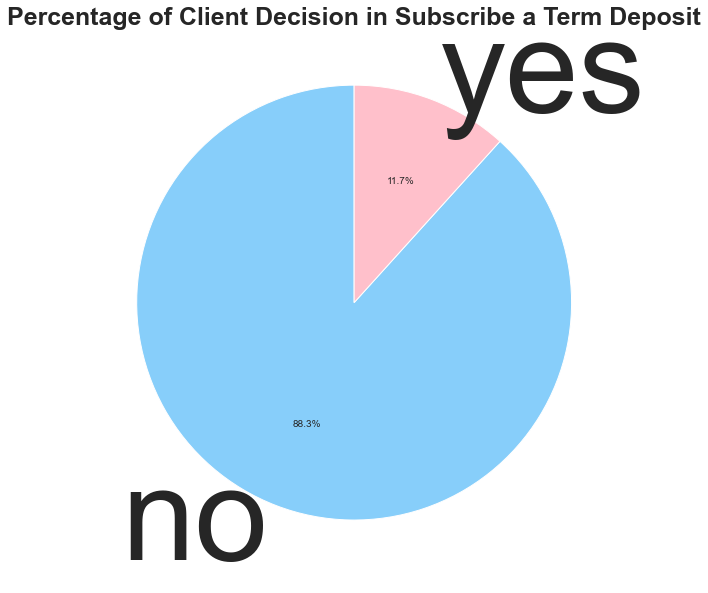

In [86]:
plt.figure(figsize=(20,10))
colors=['lightskyblue','pink']
font1 = {'weight': 'bold',
        'size': 25,
        }

ax = plt.axes()
plt.title('Percentage of Client Decision in Subscribe a Term Deposit', fontdict=font1)
ab=plt.pie(df_deposit, labels=lables, colors=colors, startangle=90,autopct='%1.1f%%')
plt.show()


Dari Pie Chart diatas dapat dilihat bahwa Persentase Keputusan Klien dalam Berlangganan Deposito Berjangka yang memilih no 88.3% dan memilih yes 11.7%

## Scaller

In [29]:
from sklearn.preprocessing import StandardScaler

df_bank = df_bank.copy()

scaler = StandardScaler()
num_cols = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']
df_bank[num_cols] = scaler.fit_transform(df_bank[num_cols])

df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1.606965,management,married,tertiary,no,0.256419,yes,no,unknown,-1.298476,may,261,-0.569351,-0.411453,-0.25194,unknown,no
1,0.288529,technician,single,secondary,no,-0.437895,yes,no,unknown,-1.298476,may,151,-0.569351,-0.411453,-0.25194,unknown,no
2,-0.747384,entrepreneur,married,secondary,no,-0.446762,yes,yes,unknown,-1.298476,may,76,-0.569351,-0.411453,-0.25194,unknown,no
3,0.571051,blue-collar,married,unknown,no,0.047205,yes,no,unknown,-1.298476,may,92,-0.569351,-0.411453,-0.25194,unknown,no
4,-0.747384,unknown,single,unknown,no,-0.447091,no,no,unknown,-1.298476,may,198,-0.569351,-0.411453,-0.25194,unknown,no


## Encoder

In [30]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
kol_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

In [31]:
# process encode categorical data 
df_encode = pd.DataFrame(encoder.fit_transform(df_bank[kol_cat]))
df_encode.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [32]:
#print(df_encode)
df_encode.columns = encoder.get_feature_names(kol_cat)
print(df_encode.columns)

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')


In [33]:
df_bank = df_bank.drop(kol_cat ,axis=1)
df_bank.head()

,age,balance,day,duration,campaign,pdays,previous,deposit
0,1.606965,0.256419,-1.298476,261,-0.569351,-0.411453,-0.25194,no
1,0.288529,-0.437895,-1.298476,151,-0.569351,-0.411453,-0.25194,no
2,-0.747384,-0.446762,-1.298476,76,-0.569351,-0.411453,-0.25194,no
3,0.571051,0.047205,-1.298476,92,-0.569351,-0.411453,-0.25194,no
4,-0.747384,-0.447091,-1.298476,198,-0.569351,-0.411453,-0.25194,no


In [34]:
df_bank_new = pd.concat([df_encode, df_bank], axis=1)
df_bank_new

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous,deposit
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.606965,0.256419,-1.298476,261,-0.569351,-0.411453,-0.251940,no
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.288529,-0.437895,-1.298476,151,-0.569351,-0.411453,-0.251940,no
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.747384,-0.446762,-1.298476,76,-0.569351,-0.411453,-0.251940,no
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.571051,0.047205,-1.298476,92,-0.569351,-0.411453,-0.251940,no
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.747384,-0.447091,-1.298476,198,-0.569351,-0.411453,-0.251940,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.947747,-0.176460,0.143418,977,0.076230,-0.411453,-0.251940,yes
45207,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.831227,0.120447,0.143418,456,-0.246560,-0.411453,-0.251940,yes
45208,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.925401,1.429593,0.143418,1127,0.721811,1.436189,1.050473,yes
45209,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.512791,-0.228024,0.143418,508,0.399020,-0.411453,-0.251940,no


In [35]:
# Encode target value
df_bank_new['deposit'] = df_bank_new['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

print(df_bank_new.shape)
df_bank_new.head()

(45211, 52)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous,deposit
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.606965,0.256419,-1.298476,261,-0.569351,-0.411453,-0.25194,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.288529,-0.437895,-1.298476,151,-0.569351,-0.411453,-0.25194,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.747384,-0.446762,-1.298476,76,-0.569351,-0.411453,-0.25194,0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.571051,0.047205,-1.298476,92,-0.569351,-0.411453,-0.25194,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.747384,-0.447091,-1.298476,198,-0.569351,-0.411453,-0.25194,0


## Memisahkan Feature dan Target

In [36]:
# select feataures
feature = df_bank_new.drop('deposit', axis=1)

In [37]:
# select target
target = df_bank_new['deposit']

## Split dataset

Split dataset menjadi data training dan data test dengan perbandingan 80 : 20

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)


print('Shape training feature:', X_train.shape)
print('Shape testing feature:', X_test.shape)
print('Shape training label:', y_train.shape)
print('Shape training label:', y_test.shape)

Shape training feature: (36168, 51)
Shape testing feature: (9043, 51)
Shape training label: (36168,)
Shape training label: (9043,)


# Membuat function evaluation model

In [39]:
# function evaluation model 
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Prediction Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    accuracy = metrics.accuracy_score(y_test, y_pred)
    
    # Calculate precision, recall, f1-score, and kappa score
    precision = metrics.precision_score(y_test, y_pred)

    # Caclculate recall 
    recall = metrics.recall_score(y_test, y_pred)
    # calculate f1-score
    f1_score = metrics.f1_score(y_test, y_pred)
    # calculate kappa score 
    kappa_score = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]

    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    
    auc_score = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1_score, 'kappa_score': kappa_score, 
           'fpr': fpr, 'tpr': tpr, 'auc_score': auc_score, 'cm': cm}

# Classification

## Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)

LogisticRegression()

In [41]:
eval_lr = evaluate_model(model_lr, X_test, y_test)
print('Logistic Regression Accuracy:', eval_lr['accuracy'])

Logistic Regression Accuracy: 0.8988167643481145


In [42]:
# Display confussion matrix
print('Confusion Matrix:', eval_lr['cm'])

Confusion Matrix: [[7802  191]
 [ 724  326]]


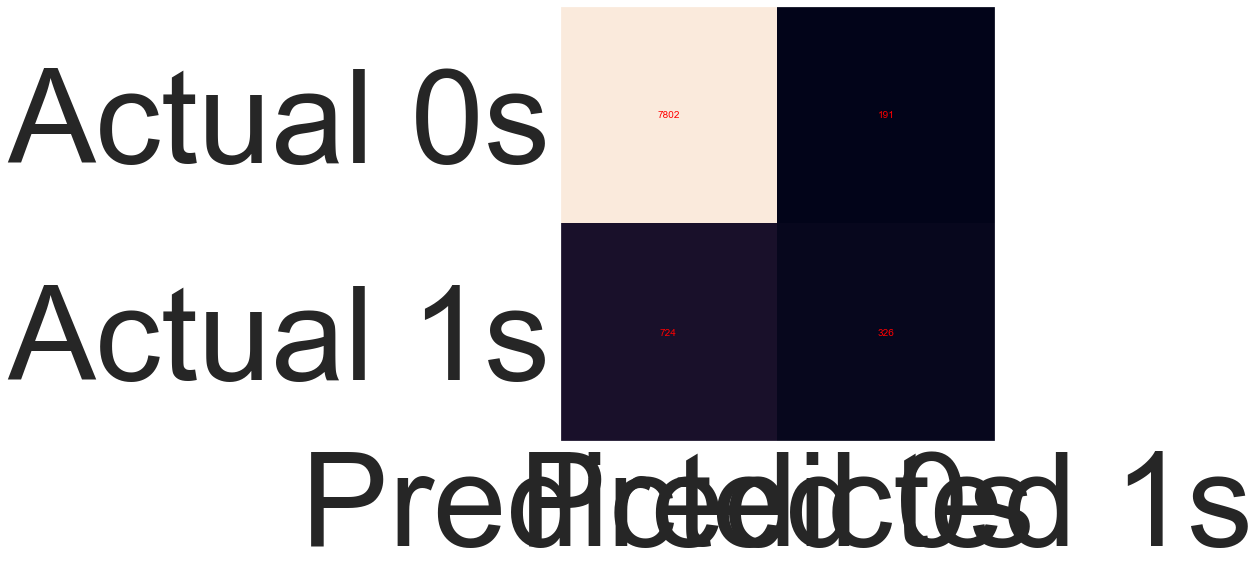

In [50]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(eval_lr['cm'])
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, eval_lr['cm'][i, j], ha='center', va='center', color='red')
plt.show()

## K-Nearest Neighbor (KNN)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [52]:
eval_knn = evaluate_model(model_knn, X_test, y_test)
print('KNN Accuracy:', eval_knn['accuracy'])

KNN Accuracy: 0.8894172287957536


In [53]:
# Display confussion matrix
print('Confusion Matrix:', eval_knn['cm'])

Confusion Matrix: [[7745  248]
 [ 752  298]]


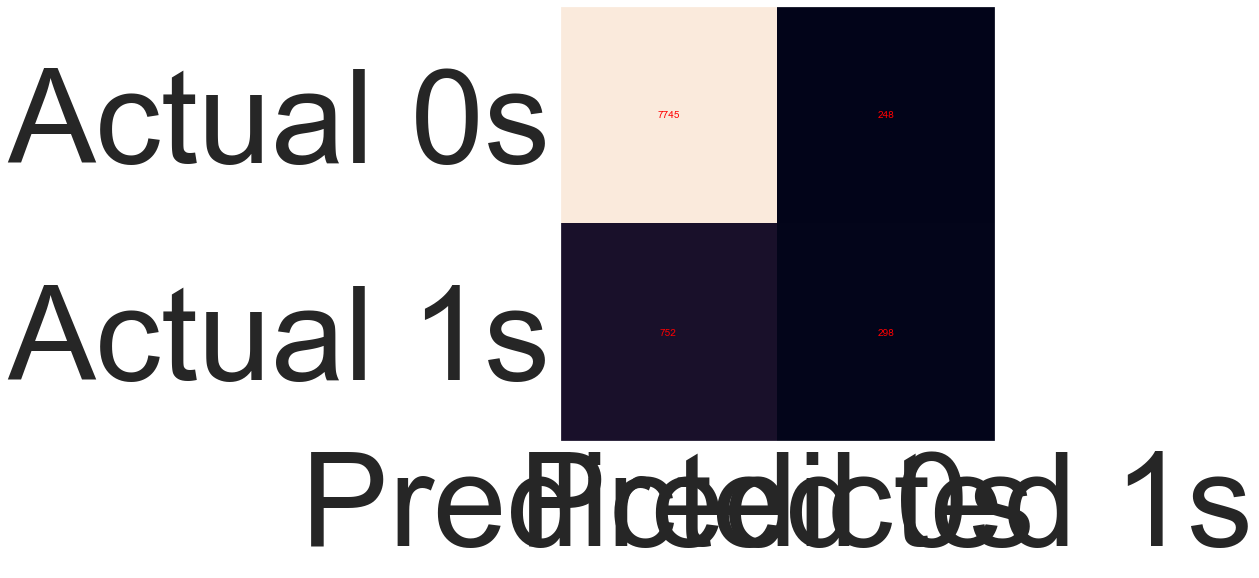

In [57]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(eval_knn['cm'])
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, eval_knn['cm'][i, j], ha='center', va='center', color='red')
plt.show()

# Support Vector Machine (SVM)

In [58]:
# Building SVM model 
from sklearn import svm
model_svm=svm.SVC()
model_svm.fit(X_train,y_train)

SVC()

In [59]:
y_pred = model_svm.predict(X_test)

In [62]:
from sklearn import metrics 
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8893066460245493


In [63]:
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:', cm)

Confusion Matrix: [[7876  117]
 [ 884  166]]


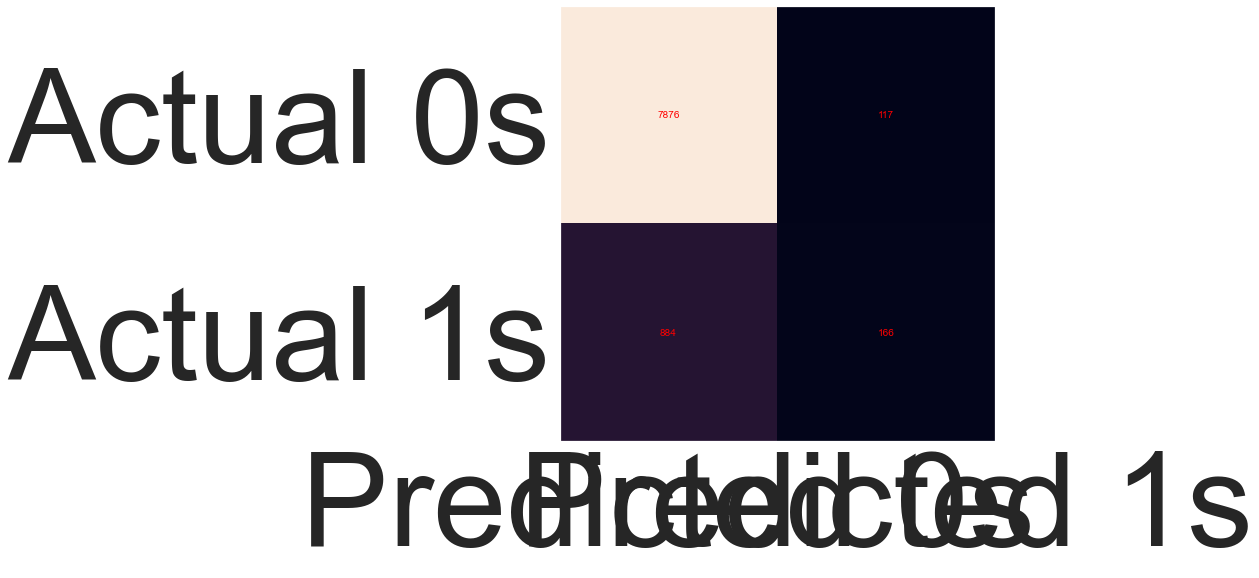

In [64]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Decision Tree

In [65]:
from sklearn import tree
model_dtree = tree.DecisionTreeClassifier(random_state=0, criterion="entropy", max_depth=3)
model_dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [66]:
eval_dtree = evaluate_model(model_dtree, X_test, y_test)
print('DecisionTree Accuracy:', eval_dtree['accuracy'])

DecisionTree Accuracy: 0.9005860886873825


In [67]:
# Display confussion matrix
print('Confusion Matrix:', eval_dtree['cm'])

Confusion Matrix: [[7784  209]
 [ 690  360]]


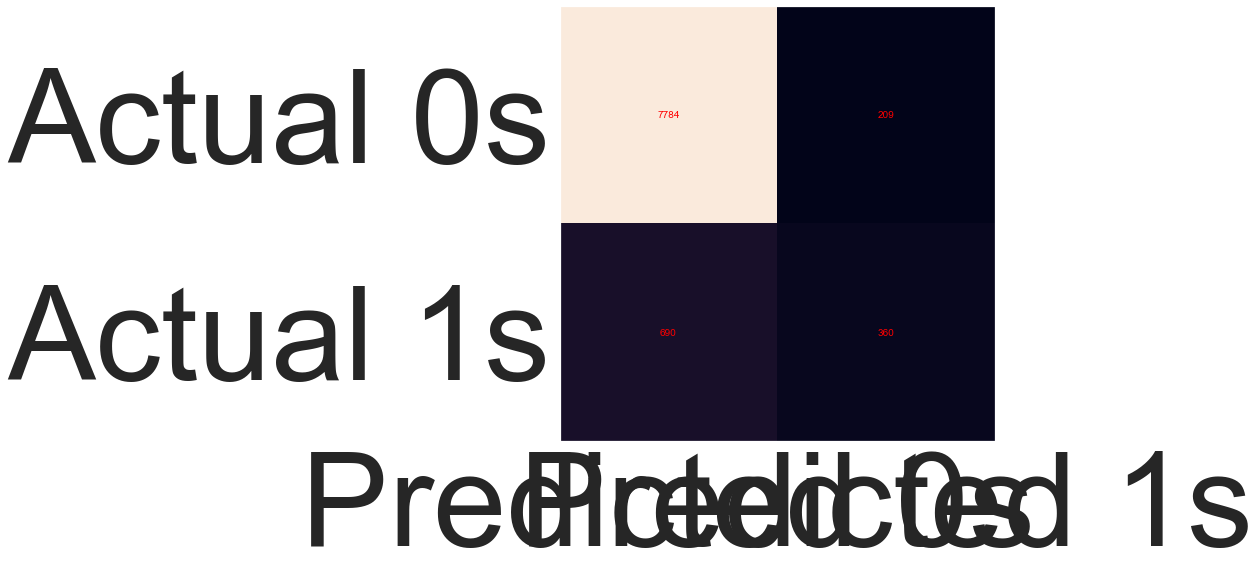

In [68]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(eval_dtree['cm'])
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, eval_dtree['cm'][i, j], ha='center', va='center', color='red')
plt.show()

# Random Forest

In [69]:
# Building Random Forest model 
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=0)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [70]:
eval_rf = evaluate_model(model_rf, X_test, y_test)
print('RandomForest Accuracy:', eval_rf['accuracy'])

RandomForest Accuracy: 0.907110472188433


In [71]:
# Display confussion matrix
print('Confusion Matrix:', eval_rf['cm'])

Confusion Matrix: [[7759  234]
 [ 606  444]]


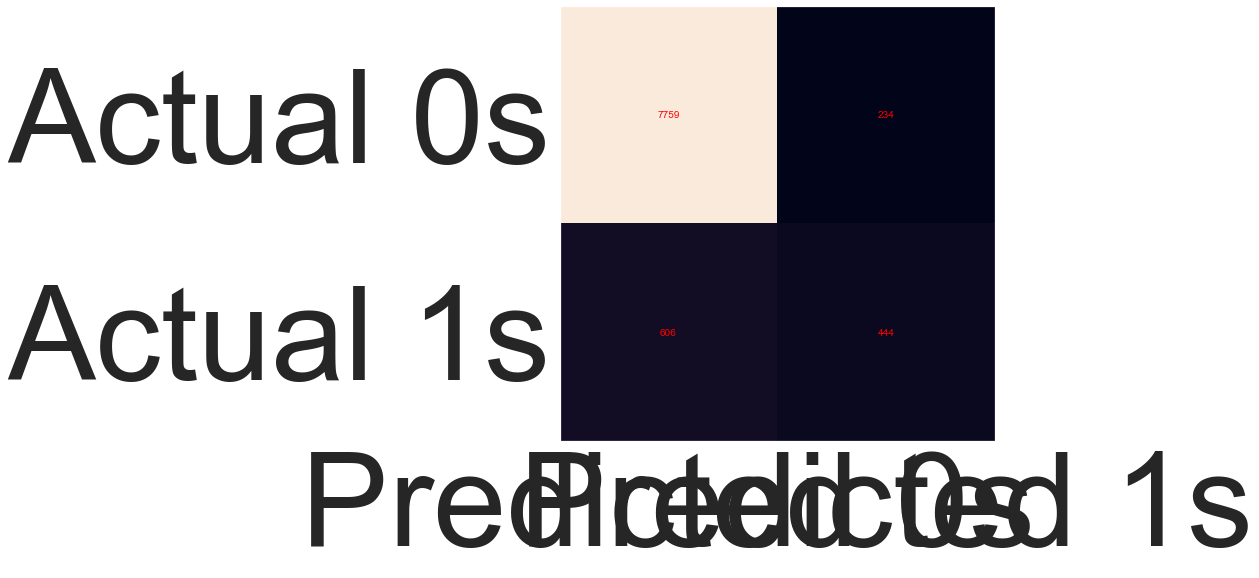

In [72]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(eval_rf['cm'])
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, eval_rf['cm'][i, j], ha='center', va='center', color='red')
plt.show()

# Naive Bayes

In [73]:
# Building Naive Bayes model 
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB()

In [74]:
eval_nb = evaluate_model(model_nb, X_test, y_test)
print('Naive Bayes Accuracy:', eval_nb['accuracy'])

Naive Bayes Accuracy: 0.8514873382726971


In [75]:
# Display confussion matrix
print('Confusion Matrix:', eval_nb['cm'])

Confusion Matrix: [[7152  841]
 [ 502  548]]


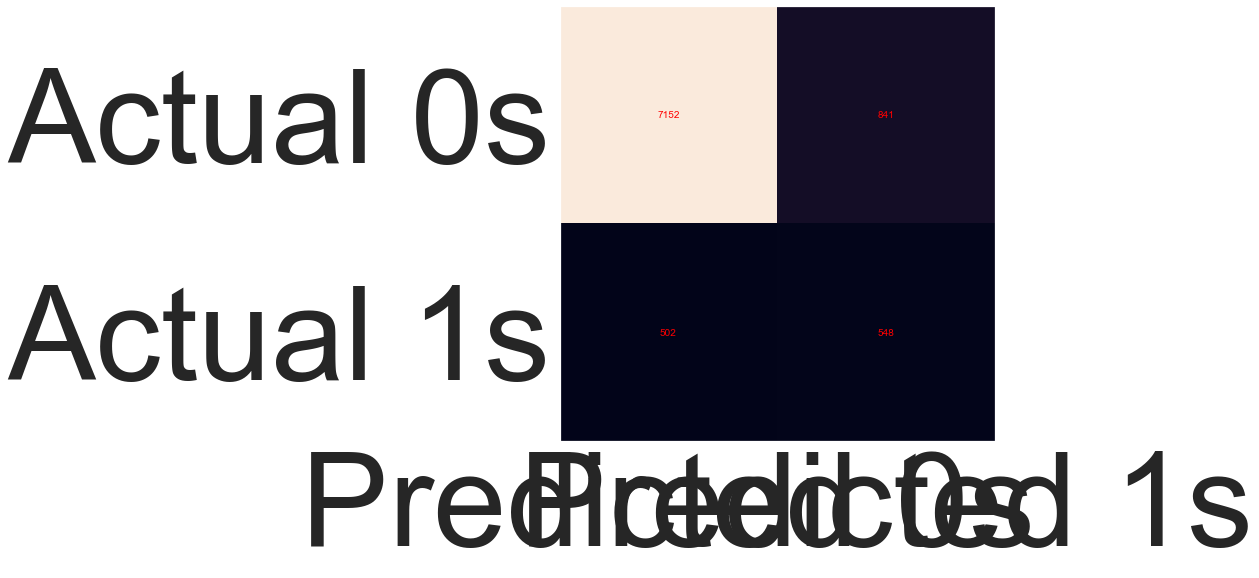

In [76]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(eval_nb['cm'])
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, eval_nb['cm'][i, j], ha='center', va='center', color='red')
plt.show()

# Algorithm Analysis

Saya memilih menggunakan algoritma random forest karena tingkat akurasi nya paling tinggi dari algoritma yang lain